# Avocados

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import warnings

# Options and Settings

In [2]:
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.autolayout'] = True
plt.rcParams['font.size'] = 12
path = os.getcwd()                                         # get current working directory
warnings.simplefilter('ignore')

# Import Data

In [3]:
filepath = os.path.join('datasets', 'Avocados.csv')

df = pd.read_csv(filepath)

df

,Country or Area,Element,Year,Unit,Value,Value Footnotes
0,Africa,Area harvested,2018.0,ha,385249.0,A
1,Africa,Area harvested,2017.0,ha,85241.0,A
2,Africa,Area harvested,2016.0,ha,88975.0,A
3,Africa,Area harvested,2015.0,ha,81448.0,A
4,Africa,Area harvested,2014.0,ha,87387.0,A
...,...,...,...,...,...,...
14133,*,Unofficial figure,NaN,NaN,NaN,NaN
14134,A,"Aggregate, may include official, semi-official...",NaN,NaN,NaN,NaN
14135,F,FAO estimate,NaN,NaN,NaN,NaN
14136,Fc,Calculated data,NaN,NaN,NaN,NaN


# Head and Tail

In [4]:
df =  df[:14132]                                  # select index position 0-14132
df

,Country or Area,Element,Year,Unit,Value,Value Footnotes
0,Africa,Area harvested,2018.0,ha,385249.0,A
1,Africa,Area harvested,2017.0,ha,85241.0,A
2,Africa,Area harvested,2016.0,ha,88975.0,A
3,Africa,Area harvested,2015.0,ha,81448.0,A
4,Africa,Area harvested,2014.0,ha,87387.0,A
...,...,...,...,...,...,...
14127,Zimbabwe,Production,1994.0,tonnes,587.0,Im
14128,Zimbabwe,Production,1993.0,tonnes,561.0,Im
14129,Zimbabwe,Production,1992.0,tonnes,536.0,Im
14130,Zimbabwe,Production,1991.0,tonnes,511.0,Im


In [5]:
df['Year'] = df['Year'].astype(int)                

df

,Country or Area,Element,Year,Unit,Value,Value Footnotes
0,Africa,Area harvested,2018,ha,385249.0,A
1,Africa,Area harvested,2017,ha,85241.0,A
2,Africa,Area harvested,2016,ha,88975.0,A
3,Africa,Area harvested,2015,ha,81448.0,A
4,Africa,Area harvested,2014,ha,87387.0,A
...,...,...,...,...,...,...
14127,Zimbabwe,Production,1994,tonnes,587.0,Im
14128,Zimbabwe,Production,1993,tonnes,561.0,Im
14129,Zimbabwe,Production,1992,tonnes,536.0,Im
14130,Zimbabwe,Production,1991,tonnes,511.0,Im


In [6]:
df.shape

(14132, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14132 entries, 0 to 14131
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country or Area  14132 non-null  object 
 1   Element          14132 non-null  object 
 2   Year             14132 non-null  int32  
 3   Unit             14132 non-null  object 
 4   Value            14132 non-null  float64
 5   Value Footnotes  11107 non-null  object 
dtypes: float64(1), int32(1), object(4)
memory usage: 607.4+ KB


In [8]:
df.rename(columns={'Country or Area': 'Country_or_Area'}, inplace=True)

df.head()

,Country_or_Area,Element,Year,Unit,Value,Value Footnotes
0,Africa,Area harvested,2018,ha,385249.0,A
1,Africa,Area harvested,2017,ha,85241.0,A
2,Africa,Area harvested,2016,ha,88975.0,A
3,Africa,Area harvested,2015,ha,81448.0,A
4,Africa,Area harvested,2014,ha,87387.0,A


In [9]:
df1 = df[['Country_or_Area', 'Element', 'Year', 'Unit', 'Value']]

df1

,Country_or_Area,Element,Year,Unit,Value
0,Africa,Area harvested,2018,ha,385249.0
1,Africa,Area harvested,2017,ha,85241.0
2,Africa,Area harvested,2016,ha,88975.0
3,Africa,Area harvested,2015,ha,81448.0
4,Africa,Area harvested,2014,ha,87387.0
...,...,...,...,...,...
14127,Zimbabwe,Production,1994,tonnes,587.0
14128,Zimbabwe,Production,1993,tonnes,561.0
14129,Zimbabwe,Production,1992,tonnes,536.0
14130,Zimbabwe,Production,1991,tonnes,511.0


In [10]:
df1.describe(include='object')

,Country_or_Area,Element,Unit
count,14132,14132,14132
unique,103,3,3
top,Africa,Production,tonnes
freq,174,5068,5068


In [11]:
df1['Country_or_Area'].value_counts()

Africa                                     174
Guatemala                                  174
Ecuador                                    174
Net Food Importing Developing Countries    174
South Africa                               174
                                          ... 
Bahamas                                     27
Portugal                                    15
Guam                                        15
Micronesia                                  15
Pacific Islands Trust Territory              6
Name: Country_or_Area, Length: 103, dtype: int64

In [12]:
df1['Element'].value_counts()

Production        5068
Area harvested    4533
Yield             4531
Name: Element, dtype: int64

In [13]:
df1['Year'].value_counts()

2018    295
2013    293
2010    293
2011    293
2012    293
2017    293
2014    293
2016    293
2015    293
2009    290
2008    290
2007    290
2006    290
2005    290
2002    287
2001    287
2000    287
2004    287
2003    287
1999    284
1998    284
1997    275
1994    275
1995    272
1993    272
1992    271
1996    269
1991    262
1990    258
1988    247
1989    245
1987    238
1985    235
1986    235
1978    204
1975    203
1976    203
1977    203
1974    203
1982    203
1983    203
1984    203
1981    201
1979    198
1980    198
1971    192
1970    192
1972    192
1973    192
1969    190
1965    189
1964    189
1963    189
1962    189
1961    189
1968    187
1967    187
1966    187
Name: Year, dtype: int64

In [14]:
df1['Unit'].value_counts()

tonnes    5068
ha        4533
hg/ha     4531
Name: Unit, dtype: int64

In [15]:
df1['Value'].describe()

count    1.413200e+04
mean     8.178847e+04
std      2.563691e+05
min      0.000000e+00
25%      2.000000e+03
50%      2.651300e+04
75%      7.857100e+04
max      6.407171e+06
Name: Value, dtype: float64

# Missing Values Exploration

In [16]:
df1.isna().sum()

Country_or_Area    0
Element            0
Year               0
Unit               0
Value              0
dtype: int64

# Grouping and Aggregation

In [17]:
country_area_grouped = df1.groupby('Country_or_Area')
country_area_grouped.head()

,Country_or_Area,Element,Year,Unit,Value
0,Africa,Area harvested,2018,ha,385249.0
1,Africa,Area harvested,2017,ha,85241.0
2,Africa,Area harvested,2016,ha,88975.0
3,Africa,Area harvested,2015,ha,81448.0
4,Africa,Area harvested,2014,ha,87387.0
...,...,...,...,...,...
14045,Zimbabwe,Area harvested,2018,ha,302.0
14046,Zimbabwe,Area harvested,2017,ha,282.0
14047,Zimbabwe,Area harvested,2016,ha,310.0
14048,Zimbabwe,Area harvested,2015,ha,293.0


# Africa Exploration

In [18]:
africa_df = country_area_grouped.get_group('Africa')
africa_df

,Country_or_Area,Element,Year,Unit,Value
0,Africa,Area harvested,2018,ha,385249.0
1,Africa,Area harvested,2017,ha,85241.0
2,Africa,Area harvested,2016,ha,88975.0
3,Africa,Area harvested,2015,ha,81448.0
4,Africa,Area harvested,2014,ha,87387.0
...,...,...,...,...,...
169,Africa,Production,1965,tonnes,66269.0
170,Africa,Production,1964,tonnes,62759.0
171,Africa,Production,1963,tonnes,61760.0
172,Africa,Production,1962,tonnes,65118.0


<function __main__.plot_scatter(x, y, hue, style, data, xlabel=None, ylabel=None, title=None)>

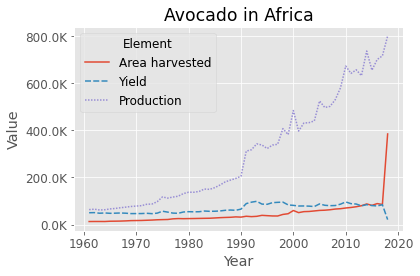

In [19]:
# helper function for formatting plot y-axis
from matplotlib.ticker import FuncFormatter

def thousand(x, pos):
    'The two args are the value and tick position'
    return '%1.1fK' % (x * 1e-3)

formatter = FuncFormatter(thousand)


def plot_scatter(x, y, hue, style, data, xlabel=None, ylabel=None, title=None):

    # create matplotlib figure
    fig, ax = plt.subplots()

    # make a line lineplot
    sns.lineplot(
        x=x, y=y,
        hue=hue, style=style, 
        data=data)
    
    # label axis
    ax.set(xlabel=xlabel, ylabel=ylabel, title=title)

    # format yaxis
    ax.yaxis.set_major_formatter(formatter)
    
    return plot_scatter

plot_scatter(x='Year', y='Value', hue='Element', style='Element', data=africa_df, 
             xlabel='Year', ylabel='Value', 
             title='Avocado in Africa')

# Asia Exploration

In [20]:
asia_df = country_area_grouped.get_group('Asia')
asia_df

,Country_or_Area,Element,Year,Unit,Value
474,Asia,Area harvested,2018,ha,74504.0
475,Asia,Area harvested,2017,ha,68135.0
476,Asia,Area harvested,2016,ha,61847.0
477,Asia,Area harvested,2015,ha,64181.0
478,Asia,Area harvested,2014,ha,56481.0
...,...,...,...,...,...
643,Asia,Production,1965,tonnes,52335.0
644,Asia,Production,1964,tonnes,51018.0
645,Asia,Production,1963,tonnes,45495.0
646,Asia,Production,1962,tonnes,44245.0


<function __main__.plot_scatter(x, y, hue, style, data, xlabel=None, ylabel=None, title=None)>

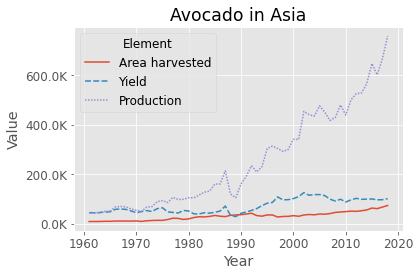

In [21]:
plot_scatter(x='Year', y='Value', hue='Element', style='Element', data=asia_df, 
             xlabel='Year', ylabel='Value', 
             title='Avocado in Asia')

# South America Exploration

In [22]:
south_america_df = country_area_grouped.get_group('South America')
south_america_df

,Country_or_Area,Element,Year,Unit,Value
11665,South America,Area harvested,2018,ha,147013.0
11666,South America,Area harvested,2017,ha,148361.0
11667,South America,Area harvested,2016,ha,139990.0
11668,South America,Area harvested,2015,ha,131734.0
11669,South America,Area harvested,2014,ha,127670.0
...,...,...,...,...,...
11834,South America,Production,1965,tonnes,256514.0
11835,South America,Production,1964,tonnes,243182.0
11836,South America,Production,1963,tonnes,240812.0
11837,South America,Production,1962,tonnes,230602.0


<function __main__.plot_scatter(x, y, hue, style, data, xlabel=None, ylabel=None, title=None)>

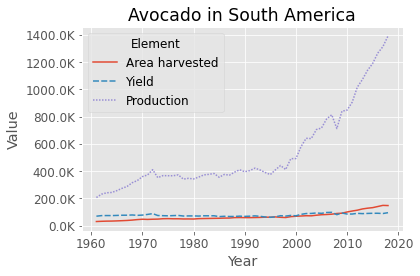

In [23]:
plot_scatter(x='Year', y='Value', hue='Element', style='Element', data=south_america_df, 
             xlabel='Year', ylabel='Value', 
             title='Avocado in South America')

# Europe Exploration

In [24]:
europe_df = country_area_grouped.get_group('Europe')
europe_df

,Country_or_Area,Element,Year,Unit,Value
4920,Europe,Area harvested,2018,ha,13012.0
4921,Europe,Area harvested,2017,ha,12660.0
4922,Europe,Area harvested,2016,ha,12290.0
4923,Europe,Area harvested,2015,ha,12241.0
4924,Europe,Area harvested,2014,ha,11766.0
...,...,...,...,...,...
5089,Europe,Production,1965,tonnes,400.0
5090,Europe,Production,1964,tonnes,347.0
5091,Europe,Production,1963,tonnes,377.0
5092,Europe,Production,1962,tonnes,373.0


<function __main__.plot_scatter(x, y, hue, style, data, xlabel=None, ylabel=None, title=None)>

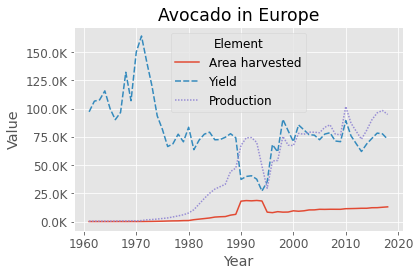

In [25]:
plot_scatter(x='Year', y='Value', hue='Element', style='Element', data=europe_df, 
             xlabel='Year', ylabel='Value', 
             title='Avocado in Europe')